In [29]:
import json 
import requests
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
url = 'https://data.nashville.gov/resource/7qhx-rexh.json?case_request=COVID-19&$limit=50000'

response = requests.get(url) 

In [3]:
violation = pd.read_json(response.text)

In [4]:
violation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16002 entries, 0 to 16001
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   case_number                16002 non-null  int64  
 1   status                     16002 non-null  object 
 2   case_request               16002 non-null  object 
 3   case_subrequest            16001 non-null  object 
 4   additional_subrequest      15983 non-null  object 
 5   date_time_opened           16002 non-null  object 
 6   date_time_closed           15941 non-null  object 
 7   case_origin                16002 non-null  object 
 8   state_issue                16002 non-null  object 
 9   closed_when_created        16002 non-null  object 
 10  incident_address           11810 non-null  object 
 11  incident_city              11091 non-null  object 
 12  incident_council_district  11123 non-null  float64
 13  incident_zip_code          11156 non-null  flo

In [5]:
violation['case_request'].unique()


array(['COVID-19'], dtype=object)

In [6]:
violation['case_subrequest'].unique()

array(['COVID-19 Questions', 'COVID-19 Violations',
       'COVID-19 Guidance for Reopening Businesses',
       'COVID-19 - Submit Input about The Plan to Reopen Nashville', nan],
      dtype=object)

In [7]:
#covid=violation[(violation['case_request']=='Resolved by hubNashville on First Call') |(violation['case_subrequest']=='Resolved by hubNashville on First Call')]

In [8]:
violation

,case_number,status,case_request,case_subrequest,additional_subrequest,date_time_opened,date_time_closed,case_origin,state_issue,closed_when_created,incident_address,incident_city,incident_council_district,incident_zip_code,latitude,longitude,mapped_location,contact_type,parent_case
0,496974,Closed,COVID-19,COVID-19 Questions,COVID-19 Questions,2020-11-06T16:17:02.000,2020-11-06T16:38:21.000,Phone,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,497626,New,COVID-19,COVID-19 Violations,COVID-19 Violations,2020-11-07T05:07:43.000,NaN,hubNashville Community,False,False,1531 Broadway,NASHVILLE,19.0,37203.0,36.154065,-86.792344,"{'latitude': '36.1540647', 'longitude': '-86.7...",NaN,NaN
2,496725,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,2020-11-06T02:05:43.000,2020-11-06T14:42:04.000,hubNashville Community,False,False,401 Union St,NASHVILLE,19.0,37219.0,36.164800,-86.779929,"{'latitude': '36.16480010000001', 'longitude':...",NaN,NaN
3,496183,Assigned,COVID-19,COVID-19 Questions,COVID-19 Questions,2020-11-05T17:24:26.000,NaN,Phone,False,False,5604 Chestnutwood Trail,HERMITAGE,12.0,37076.0,36.165840,-86.576170,"{'latitude': '36.16584', 'longitude': '-86.576...",NaN,NaN
4,496336,Closed,COVID-19,COVID-19 Questions,COVID-19 Questions,2020-11-05T19:07:40.000,2020-11-06T21:31:10.000,Phone,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15997,336815,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,2020-04-01T18:29:02.000,2020-04-01T18:42:42.000,hubNashville Community,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15998,336823,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,2020-04-01T18:34:38.000,2020-04-01T18:38:49.000,hubNashville Community,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15999,336836,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,2020-04-01T18:43:54.000,2020-04-01T18:44:31.000,hubNashville Community,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16000,330754,Closed,COVID-19,COVID-19 Questions,NaN,2020-03-22T18:51:36.000,2020-03-24T20:18:49.000,hubNashville Community,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
violation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16002 entries, 0 to 16001
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   case_number                16002 non-null  int64  
 1   status                     16002 non-null  object 
 2   case_request               16002 non-null  object 
 3   case_subrequest            16001 non-null  object 
 4   additional_subrequest      15983 non-null  object 
 5   date_time_opened           16002 non-null  object 
 6   date_time_closed           15941 non-null  object 
 7   case_origin                16002 non-null  object 
 8   state_issue                16002 non-null  object 
 9   closed_when_created        16002 non-null  object 
 10  incident_address           11810 non-null  object 
 11  incident_city              11091 non-null  object 
 12  incident_council_district  11123 non-null  float64
 13  incident_zip_code          11156 non-null  flo

In [10]:
violation['dateform']=violation['date_time_opened'].str.replace('T', ' ')

In [11]:
violation['DateTime'] = pd.to_datetime(violation['dateform'])

In [12]:
violation['monthday'] = violation['DateTime'].dt.strftime('%m-%d')


In [13]:
violation['date'] = violation['DateTime'].dt.strftime('%Y-%m-%d')
violation

,case_number,status,case_request,case_subrequest,additional_subrequest,date_time_opened,date_time_closed,case_origin,state_issue,closed_when_created,...,incident_zip_code,latitude,longitude,mapped_location,contact_type,parent_case,dateform,DateTime,monthday,date
0,496974,Closed,COVID-19,COVID-19 Questions,COVID-19 Questions,2020-11-06T16:17:02.000,2020-11-06T16:38:21.000,Phone,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-06 16:17:02.000,2020-11-06 16:17:02,11-06,2020-11-06
1,497626,New,COVID-19,COVID-19 Violations,COVID-19 Violations,2020-11-07T05:07:43.000,NaN,hubNashville Community,False,False,...,37203.0,36.154065,-86.792344,"{'latitude': '36.1540647', 'longitude': '-86.7...",NaN,NaN,2020-11-07 05:07:43.000,2020-11-07 05:07:43,11-07,2020-11-07
2,496725,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,2020-11-06T02:05:43.000,2020-11-06T14:42:04.000,hubNashville Community,False,False,...,37219.0,36.164800,-86.779929,"{'latitude': '36.16480010000001', 'longitude':...",NaN,NaN,2020-11-06 02:05:43.000,2020-11-06 02:05:43,11-06,2020-11-06
3,496183,Assigned,COVID-19,COVID-19 Questions,COVID-19 Questions,2020-11-05T17:24:26.000,NaN,Phone,False,False,...,37076.0,36.165840,-86.576170,"{'latitude': '36.16584', 'longitude': '-86.576...",NaN,NaN,2020-11-05 17:24:26.000,2020-11-05 17:24:26,11-05,2020-11-05
4,496336,Closed,COVID-19,COVID-19 Questions,COVID-19 Questions,2020-11-05T19:07:40.000,2020-11-06T21:31:10.000,Phone,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-05 19:07:40.000,2020-11-05 19:07:40,11-05,2020-11-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15997,336815,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,2020-04-01T18:29:02.000,2020-04-01T18:42:42.000,hubNashville Community,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-01 18:29:02.000,2020-04-01 18:29:02,04-01,2020-04-01
15998,336823,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,2020-04-01T18:34:38.000,2020-04-01T18:38:49.000,hubNashville Community,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-01 18:34:38.000,2020-04-01 18:34:38,04-01,2020-04-01
15999,336836,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,2020-04-01T18:43:54.000,2020-04-01T18:44:31.000,hubNashville Community,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-01 18:43:54.000,2020-04-01 18:43:54,04-01,2020-04-01
16000,330754,Closed,COVID-19,COVID-19 Questions,NaN,2020-03-22T18:51:36.000,2020-03-24T20:18:49.000,hubNashville Community,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-22 18:51:36.000,2020-03-22 18:51:36,03-22,2020-03-22


Text(0, 0.5, 'Number of incidents')

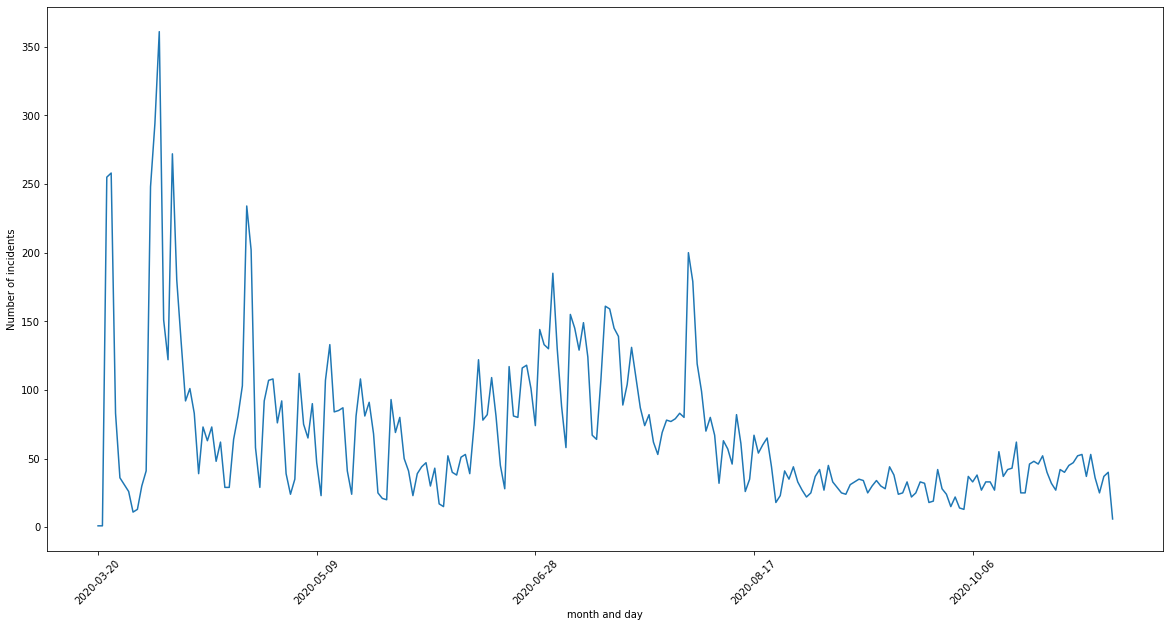

In [45]:
ax= violation['date'].value_counts().sort_index().plot(rot=45, figsize=(20, 10))
ax.set_xlabel("month and day")
ax.set_ylabel("Number of incidents")


In [21]:
violation_city=violation.groupby('incident_city')['case_request'].value_counts()
#violation_cit=pd.DataFrame(violation_city)
#violation_city=violation_city.rename({2:'Number of violations'})
#violation_city =violation_city.reset_index(drop=False)
violation_city

incident_city   case_request
ANTIOCH         COVID-19         489
BRENTWOOD       COVID-19          51
GOODLETTSVILLE  COVID-19         215
HERMITAGE       COVID-19         444
JOELTON         COVID-19          44
LA VERGNE       COVID-19           1
LAVERGNE        COVID-19           9
MADISON         COVID-19         604
NASHVILLE       COVID-19        8986
NOLENSVILLE     COVID-19           5
Nashville       COVID-19           2
OLD HICKORY     COVID-19         213
WHITES CREEK    COVID-19          28
Name: case_request, dtype: int64

Text(0.5, 0, 'Number of incidents')

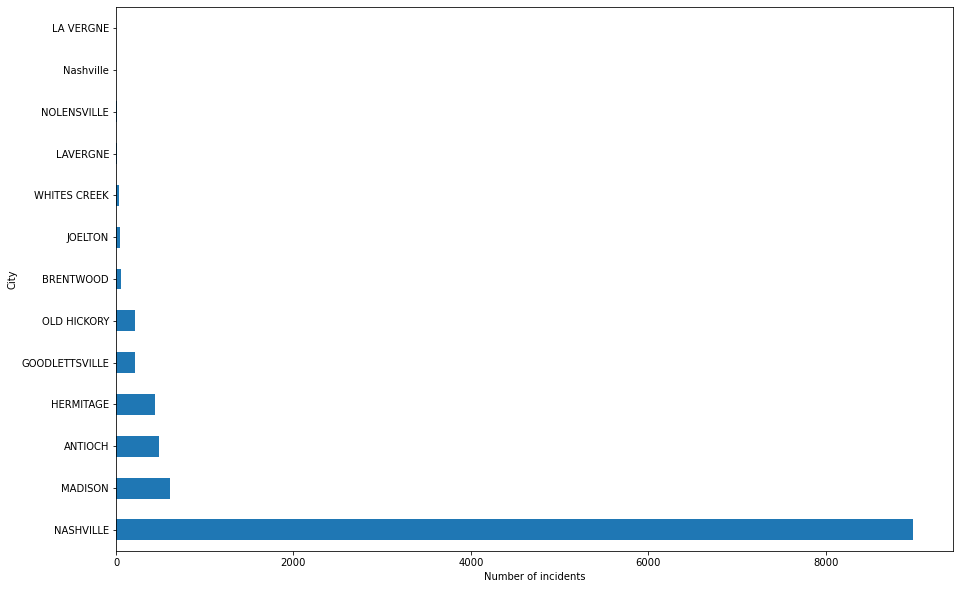

In [22]:
ax=violation['incident_city'].value_counts().plot.barh(figsize=(15,10))
#ax.set_yticklabels(violation['incident_city'])
ax.set_ylabel('City')
ax.set_xlabel("Number of incidents")
#ax.get_legend().remove()

In [17]:
cases=pd.read_csv('data/davidson_cases.csv')

In [70]:
violation_covid=cases.merge(violation, on='date')


In [74]:
violationbydate=violation_covid.groupby('date').size().to_frame('Violation count')
violationbydate=violationbydate.reset_index()

In [77]:
violation_by_date=cases.merge(violationbydate, on='date')
violation_by_date

,date,county,state,fips,cases,deaths,Violation count
0,2020-03-20,Davidson,Tennessee,47037,110,0,1
1,2020-03-21,Davidson,Tennessee,47037,140,2,1
2,2020-03-22,Davidson,Tennessee,47037,167,2,255
3,2020-03-23,Davidson,Tennessee,47037,184,2,258
4,2020-03-24,Davidson,Tennessee,47037,253,2,83
...,...,...,...,...,...,...,...
218,2020-10-24,Davidson,Tennessee,47037,33016,336,32
219,2020-10-25,Davidson,Tennessee,47037,33259,337,27
220,2020-10-26,Davidson,Tennessee,47037,33699,343,42
221,2020-10-27,Davidson,Tennessee,47037,33957,341,40


[Text(-50.0, 0, '2020-03-20'),
 Text(0.0, 0, '2020-03-21'),
 Text(50.0, 0, '2020-03-22'),
 Text(100.0, 0, '2020-03-22'),
 Text(150.0, 0, '2020-03-22'),
 Text(200.0, 0, '2020-03-22'),
 Text(250.0, 0, '2020-03-22')]

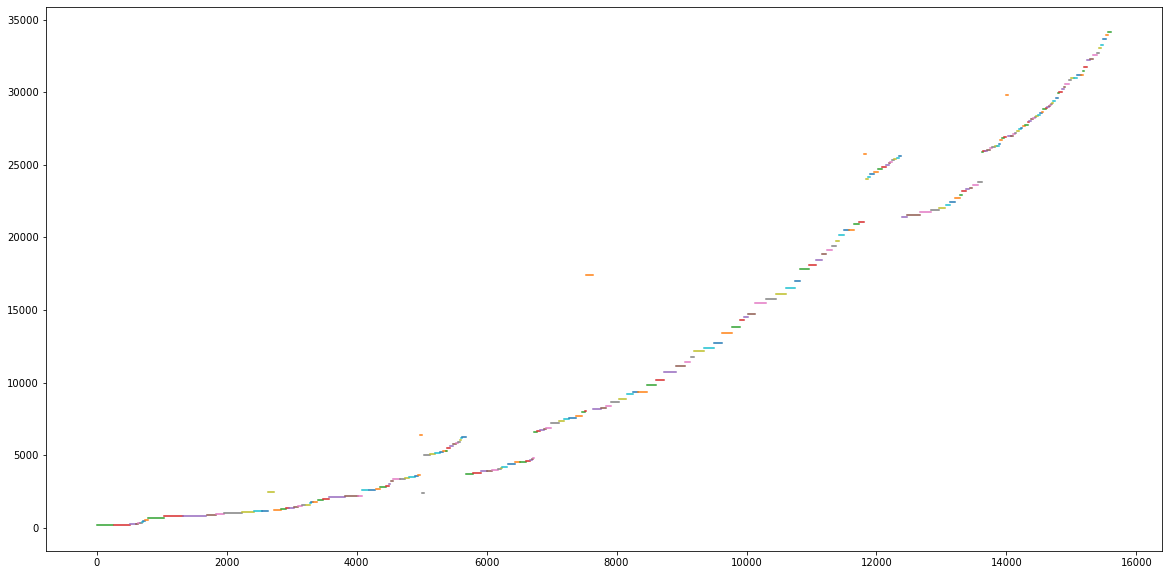

In [59]:
violation_covid.groupby('date')['cases'].plot(figsize=(20, 10))
ax.set_xticklabels(violation_covid['date'])

In [81]:
# multiline plot with group by
for key, grp in violation_by_date.groupby(['date']): 
    ax2.plot(grp['Violation count'], grp['cases'])
   
plt.show()

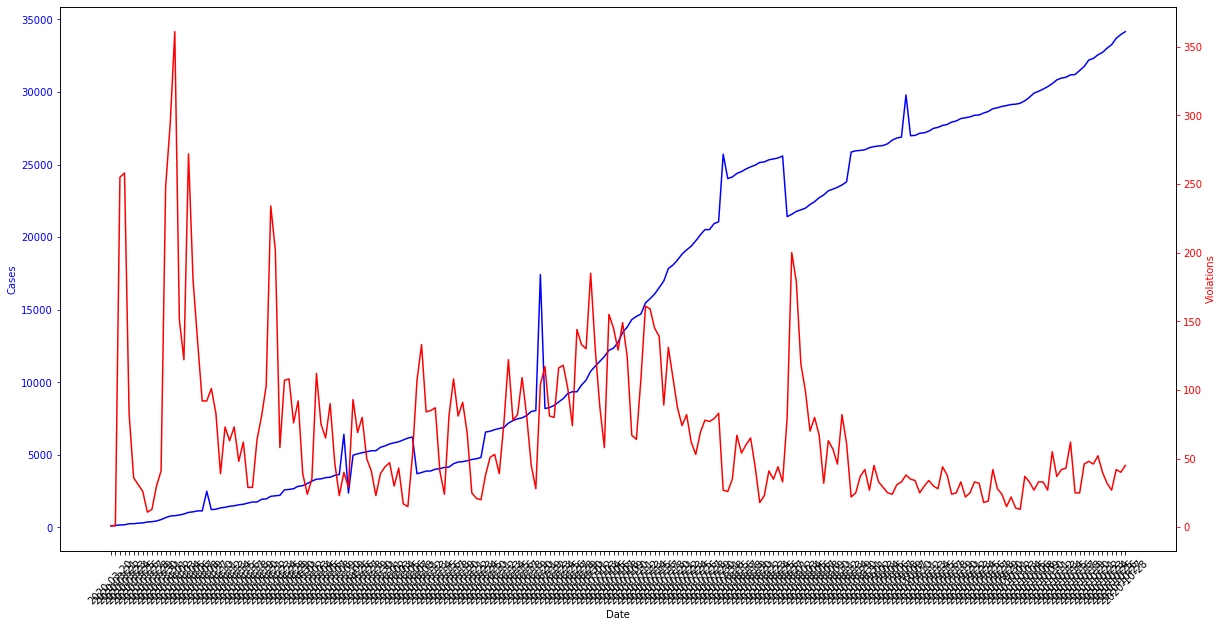

In [98]:
fig, ax = plt.subplots(figsize=(20,10), sharex=True)
ax.plot(violation_by_date['date'], violation_by_date['cases'], color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Cases', color='blue')
ax.tick_params('y', colors='blue')
ax.tick_params('x',labelrotation=45, which='major')

ax2.plot(violation_by_date['date'], violation_by_date['Violation count'],          
         color='red')
ax2.set_ylabel('Violations', color='red');
ax2.tick_params('y', colors='red')
ax.tick_params('x',labelrotation=45, which='major')

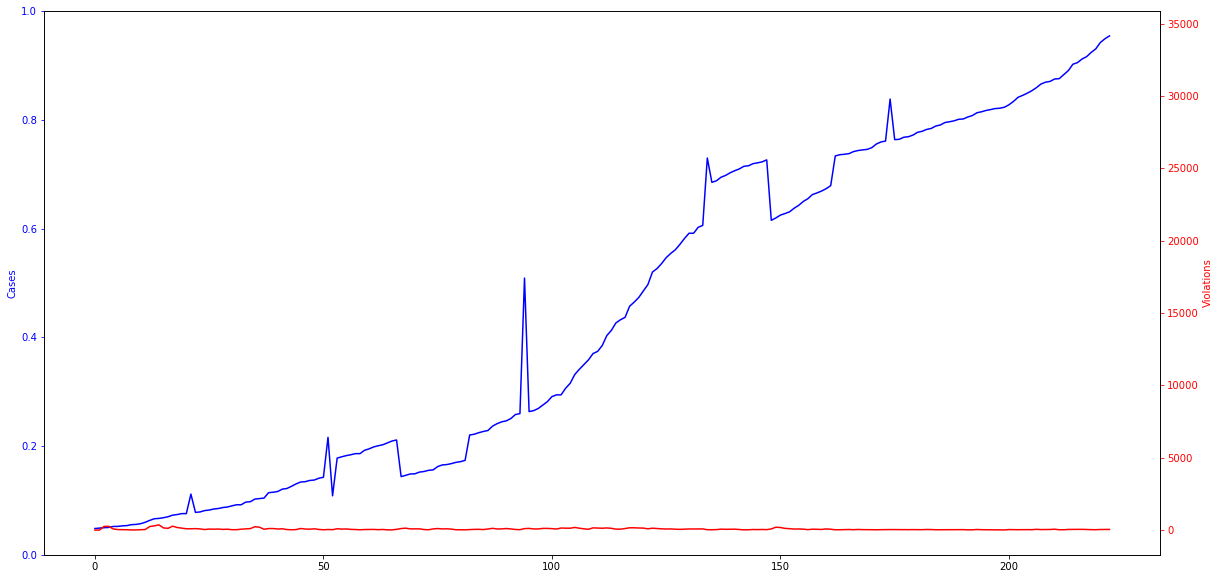

In [110]:
fig, ax = plt.subplots(figsize=(20,10))
ax2 = ax.twinx()
violation_by_date['cases'].plot(x='date', color='blue')
ax.set_ylabel('Cases', color='blue')
ax.tick_params('y', colors='blue')


violation_by_date['Violation count'].plot(x='date', color='red')
ax2.set_ylabel('Violations', color='red');
ax2.tick_params('y', colors='red')


In [116]:
cluster=pd.read_csv('data/clusters.csv')
cluster

,Cluster Name,Facility Type,Cluster Start Date,# Cases,Latitude,Longitude
0,Vanderbilt Parties,Social Gathering,3/11/2020,49,36.125891,-86.822863
1,Event at Clementine Hall,Social Gathering,3/14/2020,23,36.152444,-86.8467716
2,Religious Retreat,Social Gathering,3/25/2020,18,NaN,NaN
3,The Health Center at Richland Place,LTCF,4/3/2020,47,36.128750,-86.8195333
4,Trevecca Center for Rehab and Healing,LTCF,4/4/2020,102,36.144562,-86.7567485
...,...,...,...,...,...,...
57,One Stone Church Service,Church,9/22/2020,10,36.189960,-86.7673379
58,Miss Kelli's,Bar,10/1/2020,14,36.164369,-86.7807037
59,Nashville Rescue Mission - Women's Campus,Congregate Living,10/1/2020,70,36.167693,-86.7957557
60,Link Systems Electric,Other,10/16/2020,12,36.092924,-86.7438727


In [115]:
clustertype=pd.read_csv('data/clusters_by_type.csv')
clustertype

,Cluster Type,Number of Clusters
0,Bar,7
1,Church,2
2,College / University,5
3,Commercial-Warehouse,12
4,Congregate Living,13
5,Construction,19
6,Correctional Facility,9
7,Day Care,7
8,Food Production,2
9,Grocery,1
